# Continuous Scan Time Testing

## Initialize

In [1]:
%load_ext autoreload
%autoreload 2
import pyscan as ps
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import os

output_dir = "timeplots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
def get_time(self):
    t = ps.ItemAttribute()

    #t.time_stamp = self.runinfo.scan0.run_count
    t.time_stamp = (datetime.now()).timestamp()

    return t

## Measure Times for Continuous Scan Only

### Establish Control example up to 1,000 iterations

In [3]:
save_name = str(round((datetime.now()).timestamp())) + '.png'
output_path = os.path.join(output_dir, save_name)

In [4]:
devices = ps.ItemAttribute()
devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

runinfo = ps.RunInfo()

runinfo.scan0 = ps.ContinuousScan(stop_at=1000)

runinfo.measure_function = get_time

expt = ps.Experiment(runinfo, devices)
expt.run()

Stopping Experiment


In [5]:
save_path = expt.runinfo.data_path / '{}.hdf5'.format(expt.runinfo.long_name)
save_name = str(save_path.absolute())
loaded_expt = ps.load_experiment(save_name)
time_stamp_data = loaded_expt.time_stamp
deltas = np.diff(time_stamp_data)

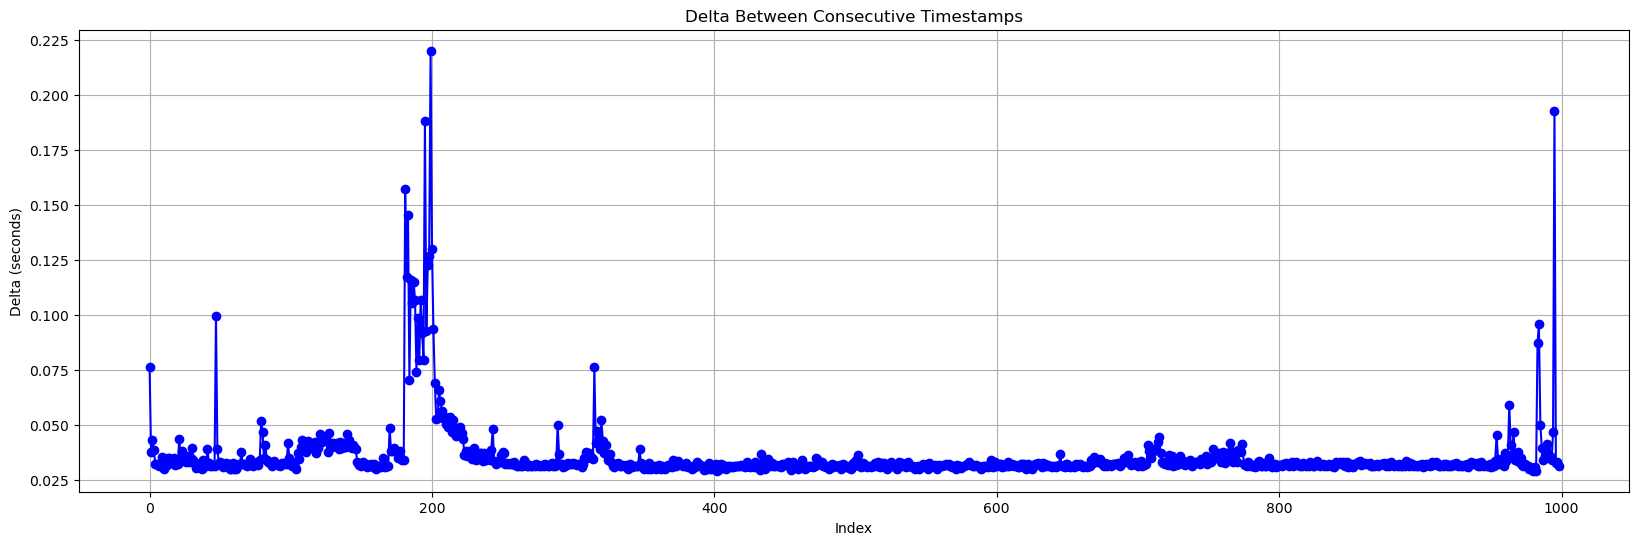

In [6]:
# Plot the deltas
plt.figure(figsize=(20, 6))
plt.plot(deltas, marker='o', linestyle='-', color='b')
plt.title('Delta Between Consecutive Timestamps')
plt.xlabel('Index')
plt.ylabel('Delta (seconds)')
plt.grid(True)

# save the figure:
plt.savefig(output_path)

plt.show()

### Measure out to distance

In [7]:
save_name = str(round((datetime.now()).timestamp())) + '.png'
output_path = os.path.join(output_dir, save_name)

In [8]:
devices = ps.ItemAttribute()
devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

runinfo = ps.RunInfo()

runinfo.scan0 = ps.ContinuousScan(stop_at=100000)

runinfo.measure_function = get_time

expt = ps.Experiment(runinfo, devices)
expt.run()

KeyboardInterrupt: 

In [11]:
save_path = expt.runinfo.data_path / '{}.hdf5'.format(expt.runinfo.long_name)
save_name = str(save_path.absolute())
loaded_expt = ps.load_experiment(save_name)
time_stamp_data = loaded_expt.time_stamp
deltas = np.diff(time_stamp_data[0:140000])

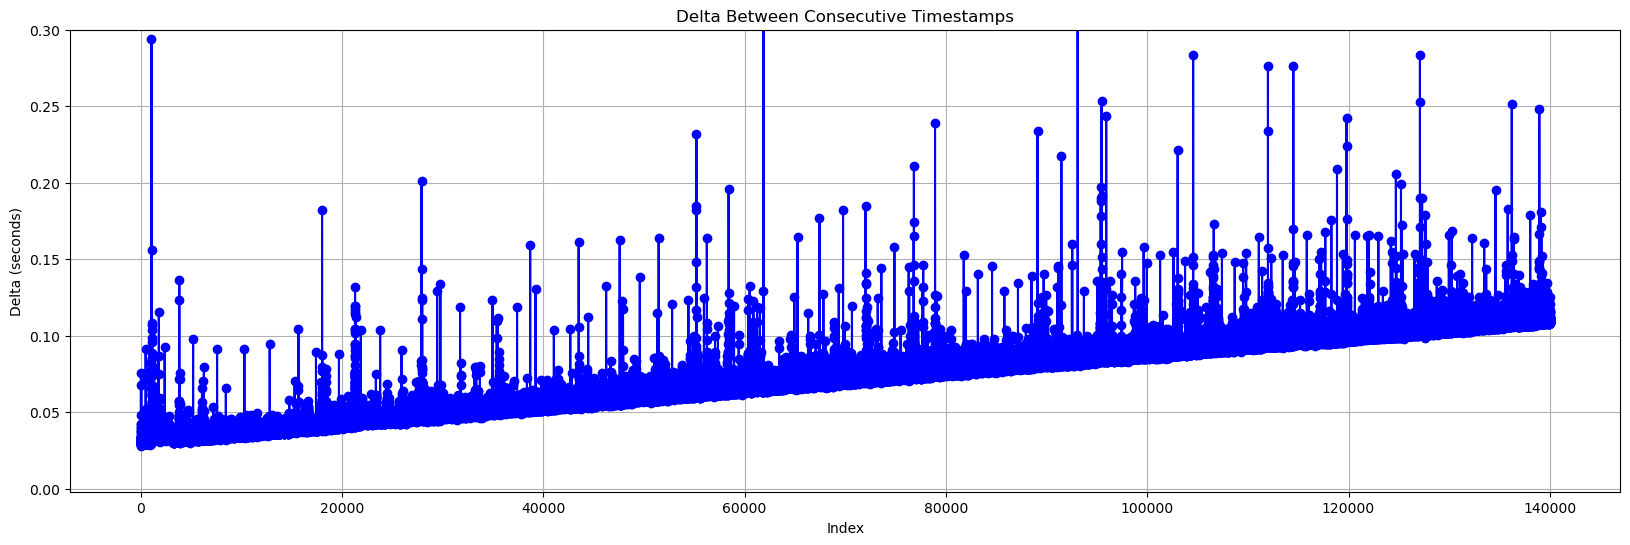

In [13]:
# Plot the deltas
plt.figure(figsize=(20, 6))
plt.plot(deltas, marker='o', linestyle='-', color='b')
plt.title('Delta Between Consecutive Timestamps')
plt.xlabel('Index')
plt.ylabel('Delta (seconds)')
plt.grid(True)

# save the figure:
plt.savefig(output_path)

plt.ylim(top=.3)
plt.show()

## Measure Time for Continuous Scan with a Repeat Scan

In [ ]:
save_name = str(round((datetime.now()).timestamp())) + '.png'
output_path = os.path.join(output_dir, save_name)

In [ ]:
devices = ps.ItemAttribute()
devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

runinfo = ps.RunInfo()

runinfo.scan0 = ps.RepeatScan(2)
runinfo.scan1 = ps.ContinuousScan(stop_at=100000)

runinfo.measure_function = get_time

expt = ps.Experiment(runinfo, devices)
expt.run()

Stopping Experiment


In [ ]:
# ps.live_plot1D(expt, data_name="time_stamp")

In [ ]:
save_path = expt.runinfo.data_path / '{}.hdf5'.format(expt.runinfo.long_name)
save_name = str(save_path.absolute())
loaded_expt = ps.load_experiment(save_name)
# loaded_expt.__dict__

In [ ]:
time_stamp_data = loaded_expt.time_stamp
# time_stamp_data

In [ ]:
deltas = []
deltas.append(np.diff(time_stamp_data[0]))
deltas.append(np.diff(time_stamp_data[1]))
# deltas

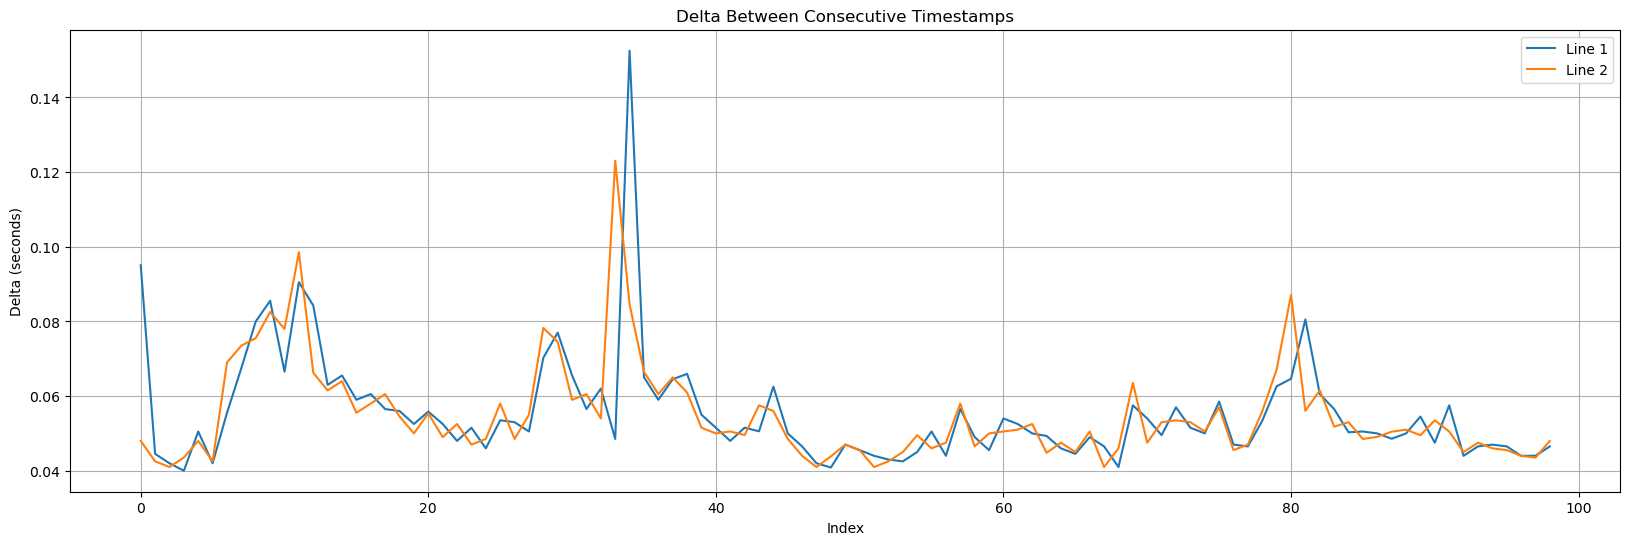

In [ ]:
# Plot the deltas
plt.figure(figsize=(20, 6))
for i, sublist in enumerate(deltas):
    plt.plot(sublist, label=f'Line {i+1}')
plt.title('Delta Between Consecutive Timestamps')
plt.xlabel('Index')
plt.ylabel('Delta (seconds)')
plt.grid(True)
plt.legend()

# save the figure:
plt.savefig(output_path)

plt.show()

## Measure Continuous Scan With Repeat and Property Scans

In [ ]:
save_name = str(round((datetime.now()).timestamp())) + '.png'
output_path = os.path.join(output_dir, save_name)

In [ ]:
devices = ps.ItemAttribute()
devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()

runinfo = ps.RunInfo()

runinfo.scan1 = ps.RepeatScan(2)
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 0.1)}, 'voltage')
runinfo.scan2 = ps.ContinuousScan(stop_at=100000)

runinfo.measure_function = get_time

expt = ps.Experiment(runinfo, devices)
expt.run()

Stopping Experiment


In [ ]:
save_path = expt.runinfo.data_path / '{}.hdf5'.format(expt.runinfo.long_name)
save_name = str(save_path.absolute())
loaded_expt = ps.load_experiment(save_name)
# loaded_expt.__dict__

In [ ]:
deltas = []
for sublist in loaded_expt.time_stamp:
    for subsublist in sublist:
        deltas.append(np.diff(subsublist))

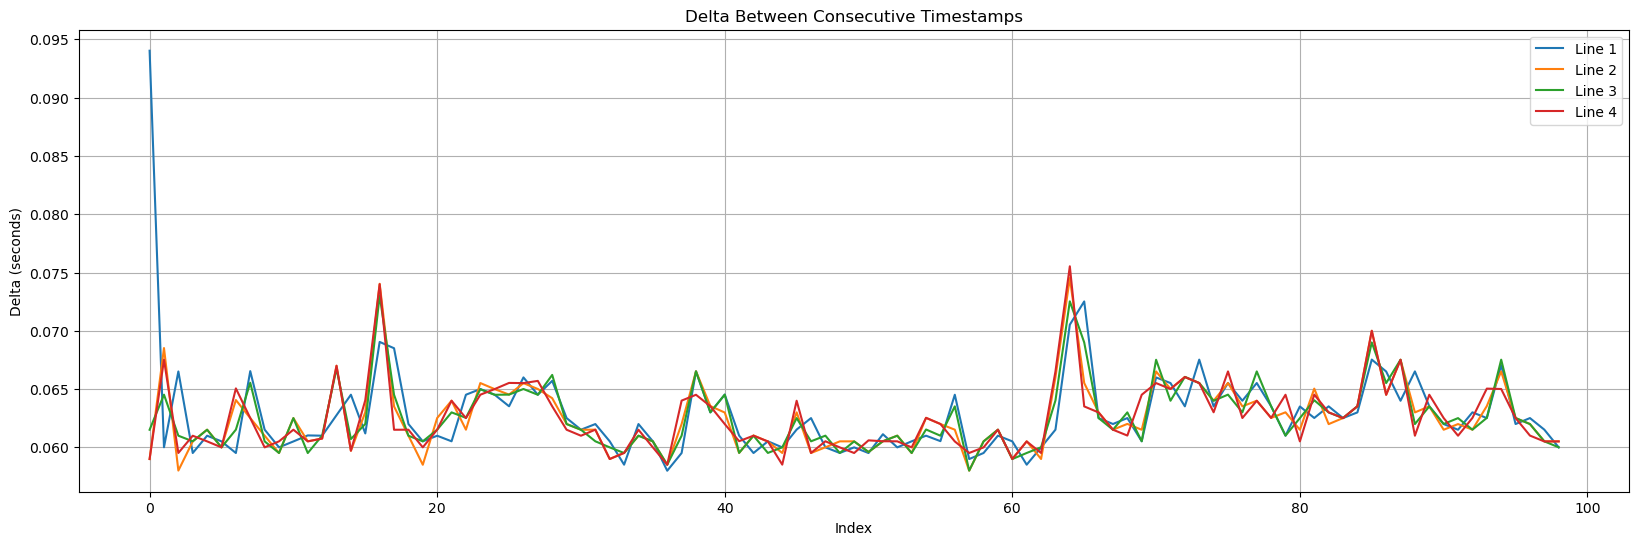

In [ ]:
# Plot the deltas
plt.figure(figsize=(20, 6))
for i, sublist in enumerate(deltas):
    plt.plot(sublist, label=f'Line {i+1}')
plt.title('Delta Between Consecutive Timestamps')
plt.xlabel('Index')
plt.ylabel('Delta (seconds)')
plt.grid(True)
plt.legend()

# save the figure:
plt.savefig(output_path)

plt.show()